In [43]:
import pandas as pd
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/viniciusono/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/viniciusono/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/viniciusono/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/viniciusono/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [44]:
fomc_data=pd.read_csv("fomc_data_final.csv")
fomc_data.head(n=200)

,Unnamed: 0,date,minutes,tar_rate_new,next_tar_rate,change,does_change
0,0,1993-02-03,A meeting of the Federal Open Market Committee...,3.00,3.00,0.00,0
1,1,1993-03-23,A meeting of the Federal Open Market Committee...,3.00,3.00,0.00,0
2,2,1993-05-18,A meeting of the Federal Open Market Committee...,3.00,3.00,0.00,0
3,3,1993-07-07,A meeting of the Federal Open Market Committee...,3.00,3.00,0.00,0
4,4,1993-08-17,A meeting of the Federal Open Market Committee...,3.00,3.00,0.00,0
...,...,...,...,...,...,...,...
195,195,2017-09-20,"The Federal Reserve, the central bank of the U...",1.25,1.25,0.00,0
196,196,2017-11-01,"The Federal Reserve, the central bank of the U...",1.25,1.50,0.25,1
197,197,2017-12-13,"The Federal Reserve, the central bank of the U...",1.50,1.50,0.00,0
198,198,2018-01-31,"The Federal Reserve, the central bank of the U...",1.50,1.75,0.25,1


In [45]:
import numpy as np

# Create a function to categorize the change in interest rates
def categorize_change(change):
    if change > 0:
        return "Increase"
    elif change < 0:
        return "Decrease"
    else:
        return "no change"

# Apply the categorize_change function to the 'change' column and create a new column called 'Label_Delta'
fomc_data['label_delta'] = np.vectorize(categorize_change)(fomc_data['change'])


In [47]:
fomc_data.to_csv("FOMC_Clean_FINAL.csv")

In [5]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Tokenize text into words
    words = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    # Remove punctuation
    translator = str.maketrans('', '', string.punctuation)
    words = [word.translate(translator) for word in words]
    # Re-tokenize text into words
    words = word_tokenize(' '.join(words))
    return words

fomc_data["minutes"]= fomc_data["minutes"].apply(preprocess_text)
fomc_data["minutes"]

0      [meeting, federal, open, market, committee, he...
1      [meeting, federal, open, market, committee, he...
2      [meeting, federal, open, market, committee, he...
3      [meeting, federal, open, market, committee, he...
4      [meeting, federal, open, market, committee, he...
                             ...                        
235    [federal, reserve, central, bank, united, stat...
236    [federal, reserve, central, bank, united, stat...
237    [federal, reserve, central, bank, united, stat...
238    [federal, reserve, central, bank, united, stat...
239    [federal, reserve, central, bank, united, stat...
Name: minutes, Length: 240, dtype: object

In [6]:
fomc_data["minutes"]


0      [meeting, federal, open, market, committee, he...
1      [meeting, federal, open, market, committee, he...
2      [meeting, federal, open, market, committee, he...
3      [meeting, federal, open, market, committee, he...
4      [meeting, federal, open, market, committee, he...
                             ...                        
235    [federal, reserve, central, bank, united, stat...
236    [federal, reserve, central, bank, united, stat...
237    [federal, reserve, central, bank, united, stat...
238    [federal, reserve, central, bank, united, stat...
239    [federal, reserve, central, bank, united, stat...
Name: minutes, Length: 240, dtype: object

In [7]:
import nltk
from nltk.tokenize import word_tokenize

# define function to remove first 20 words
def remove_first_20_words(tokenized_text):
    return tokenized_text[3000:]

# apply function to 'minutes' column
fomc_data['minutes'] = fomc_data['minutes'].apply(remove_first_20_words)
fomc_data['minutes']


0      [volatile, late, december, result, sizable, sw...
1      [nonfarm, payroll, employment, registered, sha...
2      [factor, affecting, inflation, rate, inflation...
3      [monitoring, range, growth, total, domestic, n...
4                                                     []
                             ...                        
235    [gross, domestic, income, raised, possibility,...
236    [spending, modest, several, participant, obser...
237    [observed, growth, economic, activity, slowed,...
238    [staff, measure, leverage, life, insurance, co...
239    [number, come, significant, stress, important,...
Name: minutes, Length: 240, dtype: object

In [18]:
def count_total_words(column):
    total_words = 0
    for observation in column:
        for string in observation:
            total_words += len(string.split())
    return total_words

def count_unique_words(column):
    unique_words = set()
    for observation in column:
        for string in observation:
            unique_words.update(string.split())
    return len(unique_words)

import statistics


def calculate_median_length(column):
    lengths = []
    for observation in column:
        for string in observation:
            words = string.split()
            lengths.extend(len(word) for word in words)
    if lengths:
        median_length = statistics.median(lengths)
        return median_length
    else:
        return 0  # or any default value if there are no words





In [19]:
print("Total words", count_total_words(fomc_data['minutes']))
print("Total unique words", count_unique_words(fomc_data['minutes']))
print("Total words", fomc_data['minutes'].shape)


Total words 4622140
Total unique words 7935
Total words (240,)
Mediam number words per document 7.0


In [426]:
import nltk
nltk.download('punkt')

## Determined by literature Machine Learning @ NUS Fintech Society (Words manager and unanimous determined end of introduction,)
def remove_intro(sentences):
    intro_end = False
    for i, sent in enumerate(sentences):
        if 'manager' in sent.lower() or 'unanimous' in sent.lower():
            intro_end = True
            start_idx = i+1
            break
    if intro_end:
        return sentences[start_idx:]
    else:
        return sentences

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/viniciusono/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [427]:
fomc_data["minutes"]= fomc_data["minutes"].apply(remove_intro)
fomc_data["minutes"]

0      [vote, following, longerrun, policy, 1993, app...
1      [nonfarm, payroll, employment, registered, sha...
2      [factor, affecting, inflation, rate, inflation...
3      [monitoring, range, growth, total, domestic, n...
4                                                     []
                             ...                        
235    [raise, interest, rate, paid, reserve, balance...
236    [raise, interest, rate, paid, reserve, balance...
237    [raise, interest, rate, paid, reserve, balance...
238    [raise, interest, rate, paid, reserve, balance...
239    [raise, interest, rate, paid, reserve, balance...
Name: minutes, Length: 240, dtype: object

In [21]:
fomc_data_for_bag=fomc_data
fomc_data_for_bag['minutes'] = fomc_data_for_bag['minutes'].apply(' '.join)

In [22]:
fomc_data_for_bag

,Unnamed: 0,date,minutes,tar_rate_new,next_tar_rate,change,does_change,label_delta
0,0,1993-02-03,volatile late december result sizable swing ma...,3.00,3.00,0.00,0,no change
1,1,1993-03-23,nonfarm payroll employment registered sharp in...,3.00,3.00,0.00,0,no change
2,2,1993-05-18,factor affecting inflation rate inflationary s...,3.00,3.00,0.00,0,no change
3,3,1993-07-07,monitoring range growth total domestic nonfina...,3.00,3.00,0.00,0,no change
4,4,1993-08-17,,3.00,3.00,0.00,0,no change
...,...,...,...,...,...,...,...,...
235,235,2022-09-21,gross domestic income raised possibility curre...,3.25,4.00,0.75,1,Increase
236,236,2022-11-02,spending modest several participant observed b...,4.00,4.50,0.50,1,Increase
237,237,2022-12-14,observed growth economic activity slowed signi...,4.50,4.75,0.25,1,Increase
238,238,2023-02-01,staff measure leverage life insurance company ...,4.75,5.00,0.25,1,Increase


In [23]:
import pandas as pd
from collections import Counter

# Load the Loughran-McDonald dictionary
lmdict = pd.read_csv('Loughran-McDonald_MasterDictionary_1993-2021.csv')
lmdict['Word']=lmdict['Word'].str.lower()
# Create sets of positive, negative, uncertain, etc. words based on the dictionary
positive_words = set(lmdict[lmdict['Positive'] != 0]['Word'])
negative_words = set(lmdict[lmdict['Negative'] != 0]['Word'])
uncertainty_words = set(lmdict[lmdict['Uncertainty'] != 0]['Word'])
litigious_words = set(lmdict[lmdict['Litigious'] != 0]['Word'])
constraining_words = set(lmdict[lmdict['Constraining'] != 0]['Word'])

# Function to calculate sentiment scores
def calculate_sentiment_scores(text):
    word_counts = Counter(text.split())
    total_words = sum(word_counts.values())
    
    if total_words == 0:
        return pd.Series({
            'positive_score': 0,
            'negative_score': 0,
            'uncertainty_score': 0,
            'litigious_score': 0,
            'constraining_score': 0
        })
    
    positive_score = sum(count for word, count in word_counts.items() if word in positive_words)
    negative_score = sum(count for word, count in word_counts.items() if word in negative_words)
    uncertainty_score = sum(count for word, count in word_counts.items() if word in uncertainty_words)
    litigious_score = sum(count for word, count in word_counts.items() if word in litigious_words)
    constraining_score = sum(count for word, count in word_counts.items() if word in constraining_words)
    
    return pd.Series({
        'positive_score': positive_score / total_words,
        'negative_score': negative_score / total_words,
        'uncertainty_score': uncertainty_score / total_words,
        'litigious_score': litigious_score / total_words,
        'constraining_score': constraining_score / total_words
    })

# Apply the function to your text data
fomc_data_for_bag[['positive_score', 'negative_score', 'uncertainty_score', 'litigious_score', 'constraining_score']] = fomc_data_for_bag['minutes'].apply(calculate_sentiment_scores)


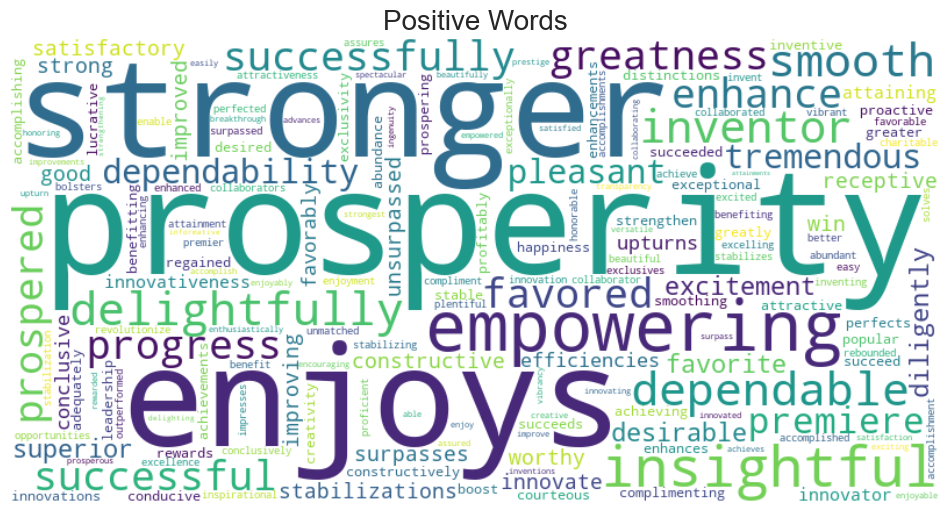

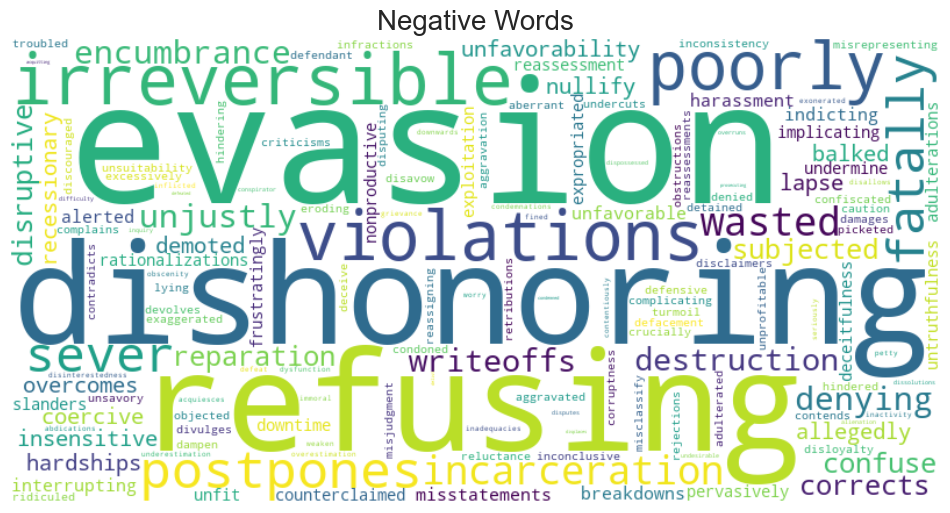

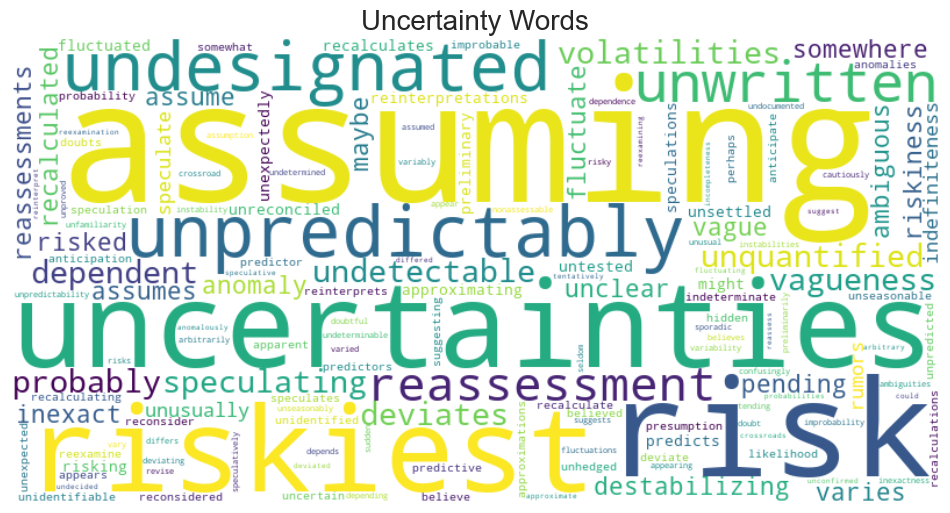

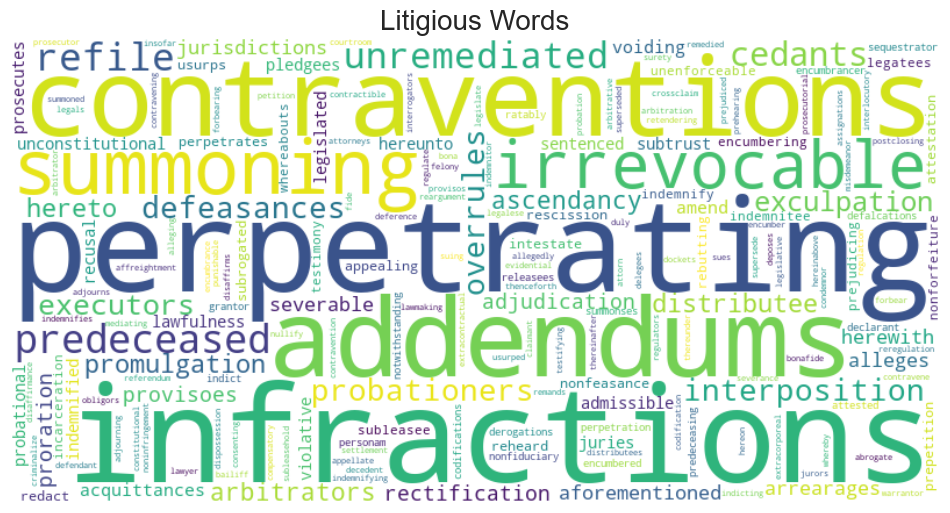

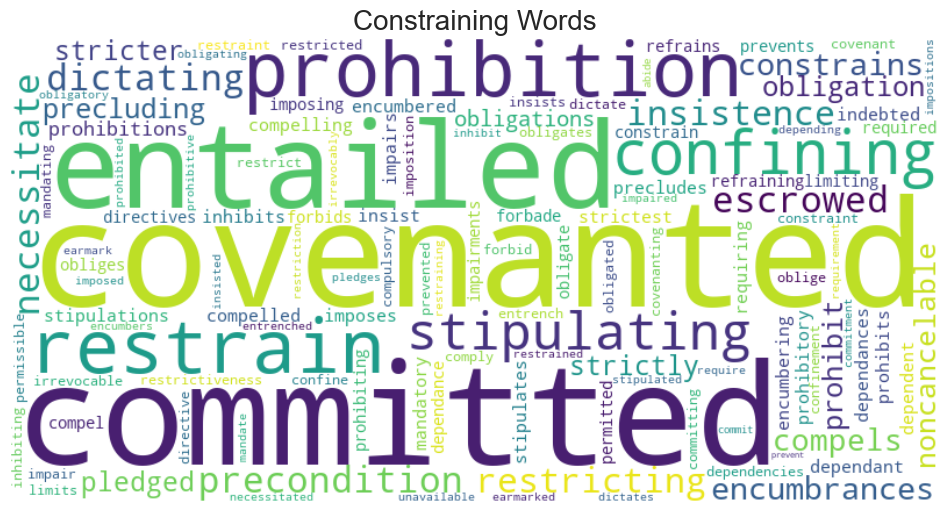

In [441]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define a function to create a word cloud given a set of words and their frequencies
def create_word_cloud(words, title):
    wc = WordCloud(width=800, height=400, max_words=200, background_color='white').generate_from_frequencies(words)
    plt.figure(figsize=(12,8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

# Create word clouds for each sentiment category
positive_words_dict = dict(zip(positive_words, fomc_data_for_bag['positive_score']))
create_word_cloud(positive_words_dict, 'Positive Words')

negative_words_dict = dict(zip(negative_words, fomc_data_for_bag['negative_score']))
create_word_cloud(negative_words_dict, 'Negative Words')

uncertainty_words_dict = dict(zip(uncertainty_words, fomc_data_for_bag['uncertainty_score']))
create_word_cloud(uncertainty_words_dict, 'Uncertainty Words')

litigious_words_dict = dict(zip(litigious_words, fomc_data_for_bag['litigious_score']))
create_word_cloud(litigious_words_dict, 'Litigious Words')

constraining_words_dict = dict(zip(constraining_words, fomc_data_for_bag['constraining_score']))
create_word_cloud(constraining_words_dict, 'Constraining Words')


In [28]:
fomc_data_for_bag

,Unnamed: 0,date,minutes,tar_rate_new,next_tar_rate,change,does_change,label_delta,positive_score,negative_score,uncertainty_score,litigious_score,constraining_score
0,0,1993-02-03,volatile late december result sizable swing ma...,3.00,3.00,0.00,0,no change,0.025040,0.040887,0.037401,0.002536,0.007290
1,1,1993-03-23,nonfarm payroll employment registered sharp in...,3.00,3.00,0.00,0,no change,0.040741,0.029630,0.031481,0.005556,0.007407
2,2,1993-05-18,factor affecting inflation rate inflationary s...,3.00,3.00,0.00,0,no change,0.025641,0.012821,0.076923,0.012821,0.012821
3,3,1993-07-07,monitoring range growth total domestic nonfina...,3.00,3.00,0.00,0,no change,0.018648,0.022533,0.030303,0.003108,0.010878
4,4,1993-08-17,,3.00,3.00,0.00,0,no change,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,235,2022-09-21,gross domestic income raised possibility curre...,3.25,4.00,0.75,1,Increase,0.017997,0.040609,0.020305,0.001384,0.013383
236,236,2022-11-02,spending modest several participant observed b...,4.00,4.50,0.50,1,Increase,0.020479,0.036166,0.023529,0.002614,0.009586
237,237,2022-12-14,observed growth economic activity slowed signi...,4.50,4.75,0.25,1,Increase,0.023245,0.041746,0.023245,0.001898,0.010436
238,238,2023-02-01,staff measure leverage life insurance company ...,4.75,5.00,0.25,1,Increase,0.019978,0.038106,0.028487,0.001850,0.008879


In [29]:
# Drop the columns and assign the resulting DataFrame to a new variable
fomc_data_for_bag_subset = fomc_data_for_bag.drop(['Unnamed: 0','next_tar_rate', 'change', 'does_change'], axis=1)
fomc_data_for_bag_subset
fomc_data_for_bag_subset["label_delta"] = pd.factorize(fomc_data_for_bag_subset["label_delta"])[0]
fomc_data_for_bag_subset["date"] = pd.factorize(fomc_data_for_bag["date"])[0]

In [272]:
fomc_data_for_bag_subset.columns

Index(['date', 'minutes', 'tar_rate_new', 'label_delta', 'positive_score',
       'negative_score', 'uncertainty_score', 'litigious_score',
       'constraining_score'],
      dtype='object')

In [212]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def report_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted')
    rec = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    cm = confusion_matrix(y_true, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"Confusion matrix:\n{cm}")


Factoring our label data

In [265]:
print(X_train.shape)
print(y_train.shape)

(216, 9)
(216,)


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

train, test = train_test_split(fomc_data_for_bag_subset, test_size=0.1, random_state=9)
X_train= train.drop('label_delta', axis=1)
X_test= test.drop('label_delta', axis=1)

#Y vectors
y_train=train["label_delta"]
y_test=test["label_delta"]

text_transformer = TfidfVectorizer()
num_scaler = StandardScaler()

preprocessor = ColumnTransformer([
    ('text', text_transformer, 'minutes'),
    ('numb', num_scaler, ['date', 'tar_rate_new', 'positive_score', 'negative_score', 'uncertainty_score', 'litigious_score', 'constraining_score']),
])


X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)


In [33]:
X_train.columns

Index(['date', 'minutes', 'tar_rate_new', 'positive_score', 'negative_score',
       'uncertainty_score', 'litigious_score', 'constraining_score'],
      dtype='object')

### Logistic Optimization

In [37]:


## Combine the preprocessor and model into a final pipeline
pipeline = Pipeline([
    ("clf", None)
])

param_grid = [{
       'clf': [LogisticRegression()],
        'clf__penalty': ['l1', 'l2'],
        'clf__C': [1.0, 0.5, 0.1],
    }]
param_grid2 = [
{
    'clf': [RandomForestClassifier()],
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5, 10],
}]
param_grid3= [{
    'clf': [XGBClassifier()],
    'clf__n_estimators': [100, 200],
    'clf__learning_rate': [0.1, 0.01],
    'clf__max_depth': [3, 5, 7],
}]
param_grid4 = [
{
    'clf': [MultinomialNB()],
    'clf__alpha': [1.0, 0.1, 0.01],
    'clf__fit_prior': [True, False],
}]


# grid_search = GridSearchCV(pipeline, param_grid, cv=10, verbose=1, n_jobs=-1, scoring="f1_weighted").fit(X_train_transformed, y_train)
# best_params = grid_search.best_params_
# print(f"Logistic Best parameters: {best_params}")

# grid_search2 = GridSearchCV(pipeline, param_grid2, cv=10, verbose=1, n_jobs=-1, scoring="f1_weighted").fit(X_train_transformed, y_train)
# best_params = grid_search2.best_params_
# print(f"Random Forest Best parameters: {best_params}")

# grid_search3 = GridSearchCV(pipeline, param_grid3, cv=10, verbose=1, n_jobs=-1, scoring="f1_weighted").fit(X_train_transformed, y_train)
# best_params = grid_search.best_params_
# print(f"XGB Forest Best parameters: {best_params}")


grid_search4 = GridSearchCV(pipeline, param_grid4, cv=10, verbose=1, n_jobs=-1, scoring="f1_weighted").fit(X_train_transformed, y_train)
best_params = grid_search4.best_params_
print(f"Naive Bayes parameters: {best_params}")


Fitting 10 folds for each of 6 candidates, totalling 60 fits


ValueError: Negative values in data passed to MultinomialNB (input X)

In [455]:
y_pred = grid_search4.predict(X_train_transformed)
report_metrics(y_train, y_pred)

Accuracy: 0.9583
Precision: 0.9608
Recall: 0.9583
F1-score: 0.9575
Confusion matrix:
[[145   0   0]
 [  6  39   0]
 [  3   0  23]]


In [362]:
fomc_data_for_bag_subset

,date,minutes,tar_rate_new,label_delta,positive_score,negative_score,uncertainty_score,litigious_score,constraining_score
0,0,meeting federal open market committee held off...,3.00,0,0.018684,0.025833,0.023233,0.009098,0.007474
1,1,meeting federal open market committee held off...,3.00,0,0.026836,0.036158,0.024859,0.004802,0.008475
2,2,meeting federal open market committee held off...,3.00,0,0.021442,0.034113,0.030864,0.003249,0.012021
3,3,meeting federal open market committee held off...,3.00,0,0.021927,0.026825,0.035689,0.003499,0.006531
4,4,meeting federal open market committee held off...,3.00,0,0.023975,0.029882,0.023628,0.005212,0.008687
...,...,...,...,...,...,...,...,...,...
235,235,federal reserve central bank united state prov...,3.25,1,0.015289,0.033482,0.018967,0.002516,0.006580
236,236,federal reserve central bank united state prov...,4.00,1,0.014731,0.035316,0.019452,0.002833,0.005666
237,237,federal reserve central bank united state prov...,4.50,1,0.016445,0.036805,0.019186,0.003524,0.004894
238,238,federal reserve central bank united state prov...,4.75,1,0.015781,0.031036,0.018587,0.002981,0.005786


In [ ]:
y_pred = grid_search3.predict(X_test_transformed)
report_metrics(y_test, y_pred)

In [ ]:
y_pred = grid_search4.predict(X_test_transformed)
report_metrics(y_test, y_pred)

In [414]:
fomc_data_for_bag.columns

Index(['Unnamed: 0', 'date', 'minutes', 'tar_rate_new', 'next_tar_rate',
       'change', 'does_change', 'label_delta'],
      dtype='object')

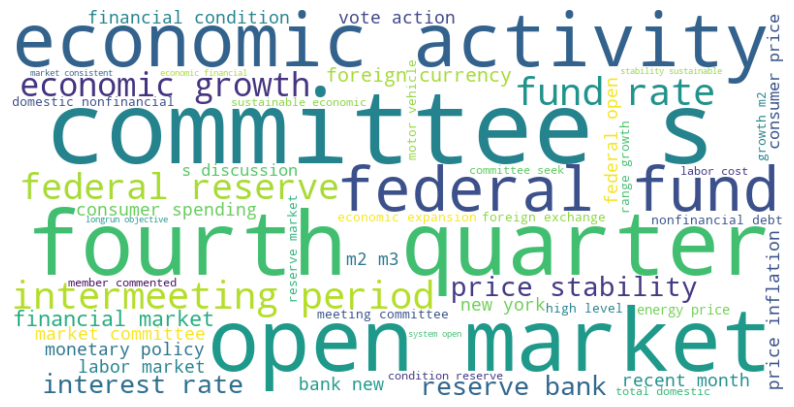

In [444]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Combine all documents into a single string
all_text = " ".join(fomc_data_for_bag['minutes'])

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50, contour_width=3, contour_color='steelblue')
wordcloud.generate(all_text)

# Display word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [39]:
y_train.value_counts()

0    145
1     45
2     26
Name: label_delta, dtype: int64

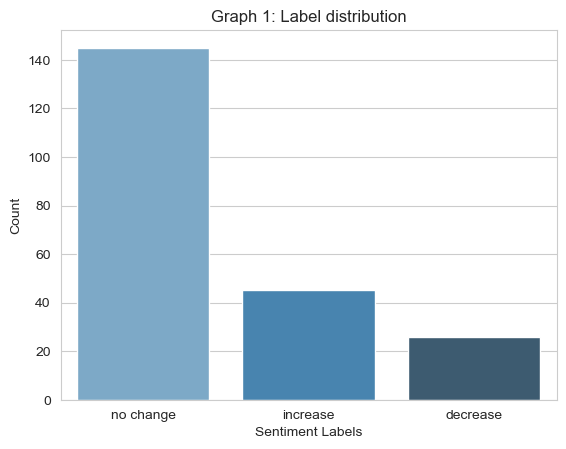

In [40]:
import seaborn as sns

# Get label distribution
label_counts = y_train.value_counts()

# Create bar chart with updated x-axis labels
sns.set_style("whitegrid")
ax = sns.barplot(x=["no change", "increase", "decrease"], y=label_counts.values, palette="Blues_d")
ax.set_title("Graph 1: Label distribution")
ax.set_xlabel("Sentiment Labels")
ax.set_ylabel("Count")
plt.show()


In [393]:
fomc_data_for_bag["minutes"]

0      meeting federal open market committee held off...
1      meeting federal open market committee held off...
2      meeting federal open market committee held off...
3      meeting federal open market committee held off...
4      meeting federal open market committee held off...
                             ...                        
235    federal reserve central bank united state prov...
236    federal reserve central bank united state prov...
237    federal reserve central bank united state prov...
238    federal reserve central bank united state prov...
239    federal reserve central bank united state prov...
Name: minutes, Length: 240, dtype: object